In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from matplotlib import colors
import turtle
import math


ModuleNotFoundError: No module named 'assertpy'

# Basic Algebra Exercise
## Functions, Polynomials, Complex Numbers. Applications of Abstract Algebra

### Problem 1. Polynomial Interpolation
We know that if we have a set of $n$ data points with coordinates $(x_1; y_1), (x_2; y_2), \dots, (x_n; y_n)$, we can try to figure out what function may have generated these points.

Please note that **our assumptions about the data** will lead us to choosing one function over another. This means that our results are as good as our data and assumptions. Therefore, it's extremely important that we write down our assumptions (which sometimes can be difficult as we sometimes don't realize we're making them). It will be better for our readers if they know what those assumptions and models are.

In this case, we'll state two assumptions:
1. The points in our dataset are generated by a polynomial function
2. The points are very precise, there is absolutely no error in them. This means that the function should pass **through every point**

This method is called *polynomial interpolation* (*"polynomial"* captures assumption 1 and *"interpolation"* captures assumption 2).

It can be proved (look at [Wikipedia](https://en.wikipedia.org/wiki/Polynomial_interpolation) for example) that if we have $n$ data points, there is only one polynomial of degree $n-1$ which passes through them. In "math speak": "the vector spaces of $n$ points and polynomials of degree $n-1$ are isomorphic (there exists a bijection mapping one to the other)".

There are a lot of ways to do interpolation. We can also write the function ourselves if we want but this requires quite a lot more knowledge than we already covered in this course. So we'll use a function which does this for us. `numpy.polyfit()` is one such function. It accepts three main parameters (there are others as well, but they are optional): a list of $x$ coordinates, a list of $y$ coordinates, and a polynomial degree.

Let's say we have these points:
```python
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])
```

First, we need to "extract" the coordinates:
```python
x = points[:, 0]
y = points[:, 1]
```

Then, we need to calculate the interpolating polynomial. For the degree, we'll initially set $n-1$:
```python
poly = np.polynomial.polynomial.Polynomial.fit(...)
# TODO: Find a way to make the line shorter; call the correct arguments
```

After that, we need to plot the function. To do this, we'll create a range of $x$ values and evaluate the polynomial at each value:
```python
plot_x = np.linspace(np.min(x), np.max(x), 1000) # If you want, pass the number of points as a parameter
plot_y = poly(plot_x)
```

Finally, we need to plot the result. We'll plot both the fitting polynomial curve (using `plt.plot()`) and the points (using `plt.scatter`). It's also nice to have different colors to make the line stand out from the points.
```python
plt.plot(plot_x, plot_y, c = "green")
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
```
Don't forget to label the axes!

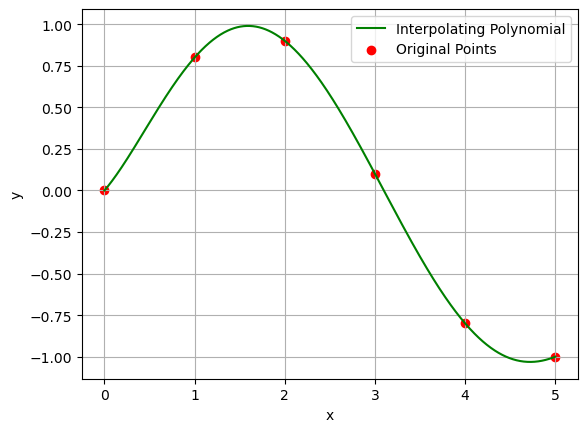

In [2]:

# Given points
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])

# Extract x and y coordinates
x = points[:, 0]
y = points[:, 1]

# Compute the interpolating polynomial (degree = n-1)
degree = len(x) - 1
poly = np.polynomial.polynomial.Polynomial.fit(x, y, degree)

# Generate points for plotting the polynomial
plot_x = np.linspace(np.min(x), np.max(x), 1000)
plot_y = poly(plot_x)

# Plot the polynomial and the original points
plt.plot(plot_x, plot_y, c="green", label="Interpolating Polynomial")
plt.scatter(x, y, c="red", label="Original Points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

Your task now is to **wrap the code in a function**. It should accept a list of points, the polynomial degree, min and max value of $x$ used for plotting. 

**Be extremely careful to ensure that the function uses its parameters!** Of course, you can extract other utility functions if you wish (e.g., separating plotting from the rest is a good idea).

We'll use this function to try some other cases.

In [14]:

def interpolate_polynomial(points, degree, min_x, max_x):
    """
    Interpolates a polynomial of the specified degree through the given points and plots it.

    Parameters:
    -----------
    points : list of tuples or ndarray
        A list of (x, y) points to interpolate.
    degree : int
        The degree of the interpolating polynomial.
    min_x : float
        The minimum x-value for plotting the polynomial.
    max_x : float
        The maximum x-value for plotting the polynomial.
    """
    # Convert points to a numpy array if it's not already
    points = np.array(points)
    
    # Extract x and y coordinates
    x = points[:, 0]
    y = points[:, 1]
    
    # Compute the interpolating polynomial
    poly = np.polynomial.polynomial.Polynomial.fit(x, y, degree)
    
    # Generate points for plotting the polynomial
    plot_x = np.linspace(min_x, max_x, 1000)
    plot_y = poly(plot_x)
    
    # Plot the polynomial and the original points
    plt.plot(plot_x, plot_y, c="green", label="Interpolating Polynomial")
    plt.scatter(x, y, c="red", label="Original Points")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid()
    plt.show()
    return poly.convert().coef


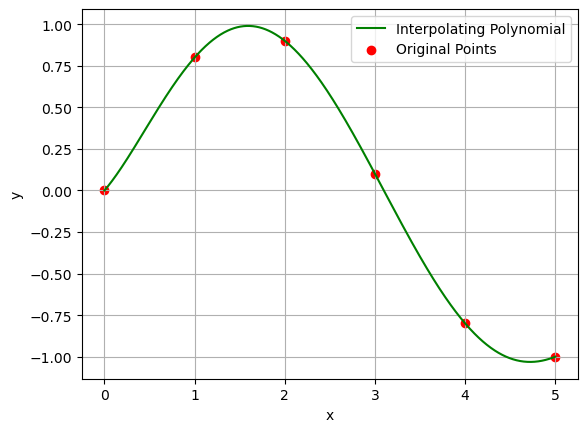

In [4]:
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])
interpolate_polynomial(points, len(points) - 1, np.min(points[:, 0]), np.max(points[:, 0]))

We see this is a very nice fit. This is expected, of course. Let's try to expand our view a little. Let's try to plot other values of $x$, further than the original ones. This is **extrapolation**.

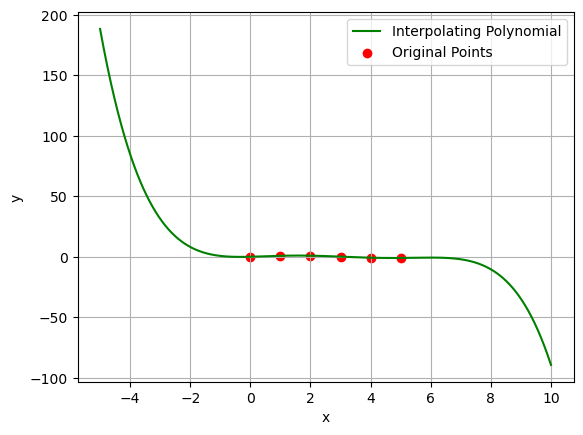

In [5]:
interpolate_polynomial(points, len(points) - 1, -5, 10)

Hmmm... it seems our polynomial goes a little wild outside the original range. This is to show how **extrapolation can be quite dangerous**.

Let's try a lower polynomial degree now. We used 4, how about 3, 2 and 1?
**Note:** We can add titles to every plot so that we know what exactly we're doing. Te title may be passed as an additional parameter to our function.

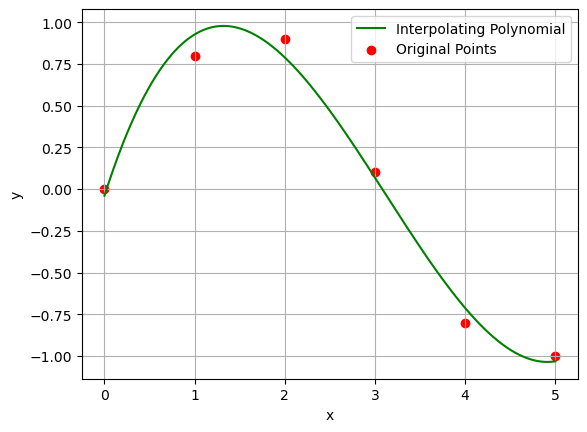

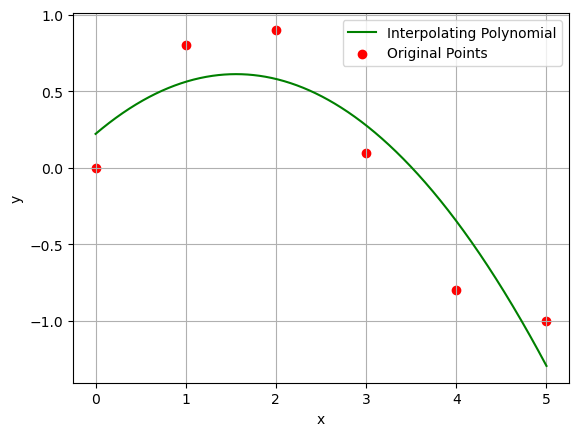

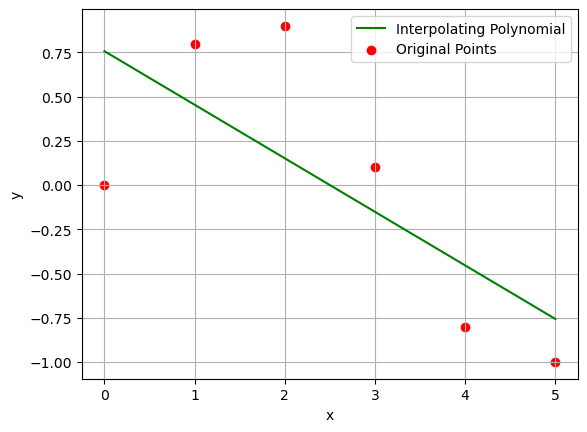

In [6]:
interpolate_polynomial(points, 3, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 2, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 1, np.min(points[:, 0]), np.max(points[:, 0]))

We see the fitting curves (or line in the last case) struggle more and more and they don't pass through every point. This breaks our assumptions but it can be very useful.

Okay, one more thing. How about increasing the degree? Let's try 5, 7 and 10. Python might complain a little, just ignore it, everything is fine... sort of :).

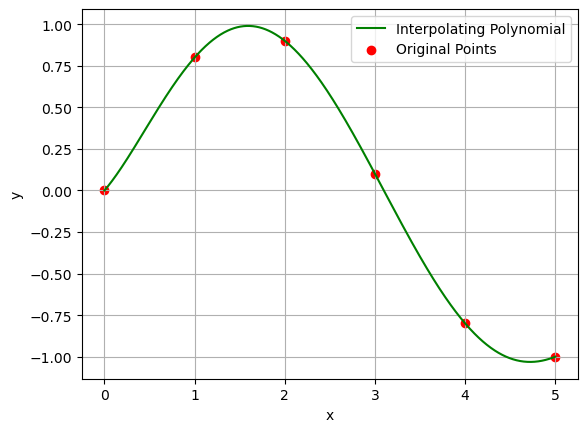

c:\ProgramData\anaconda3\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


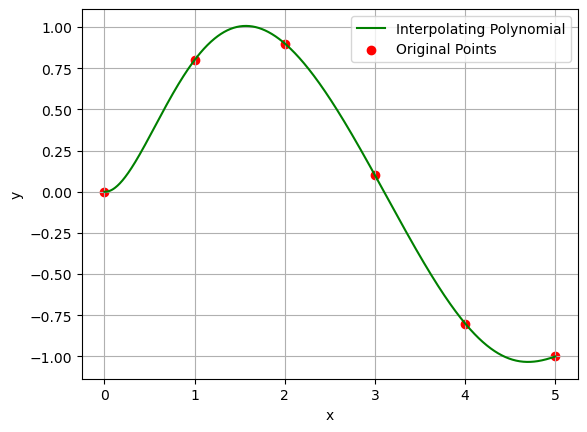

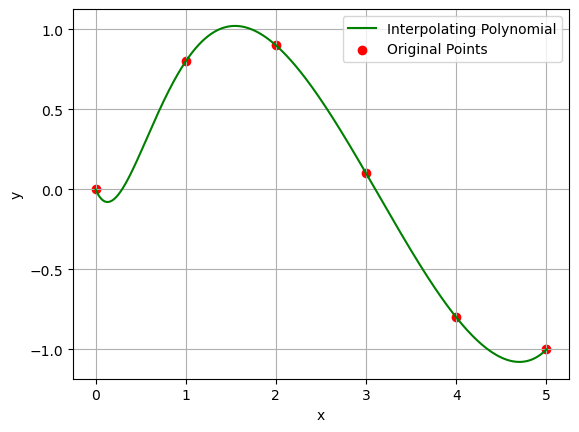

In [7]:
interpolate_polynomial(points, 5, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 7, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 10, np.min(points[:, 0]), np.max(points[:, 0]))

Those graphs look pretty much the same. But that's the point exactly. I'm being quite sneaky here. Let's try to expand our view once again and see what our results really look like.

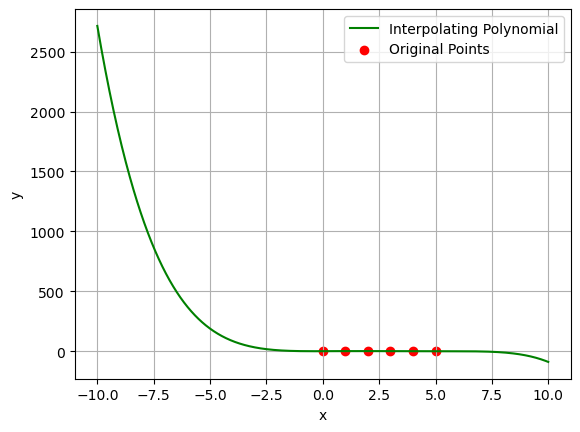

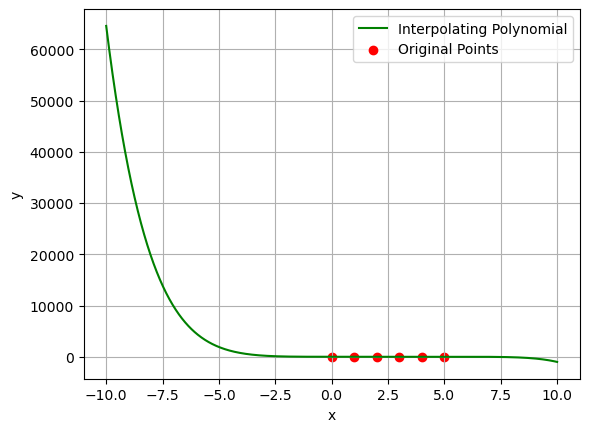

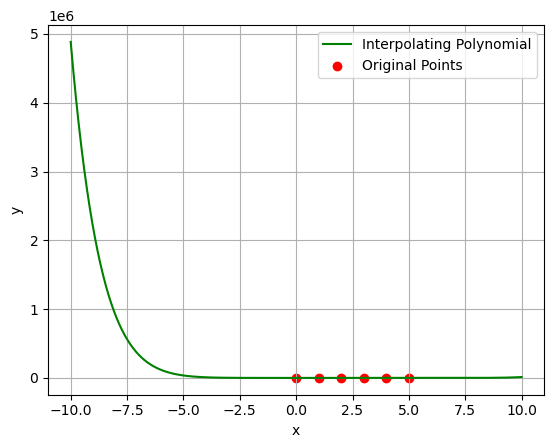

In [8]:
interpolate_polynomial(points, 5, -10, 10)
interpolate_polynomial(points, 7, -10, 10)
interpolate_polynomial(points, 10, -10, 10)

Now we see there are very wild differences. Even though the first two plots look quite similar, look at the $y$ values - they're quite different.

So, these are the dangers of interpolation. Use a too high degree, and you get "the polynomial wiggle". These are all meant to represent **the same** data points but they look insanely different. Here's one more comparison.

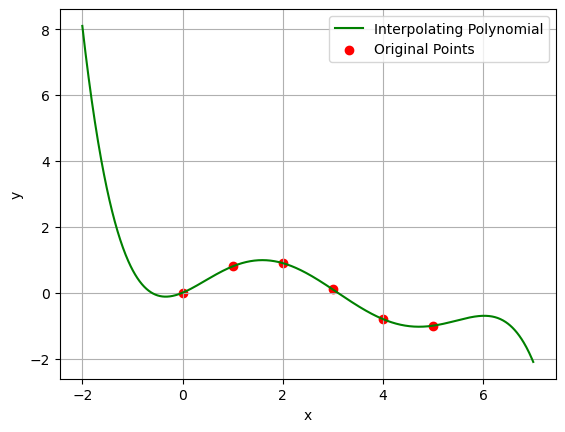

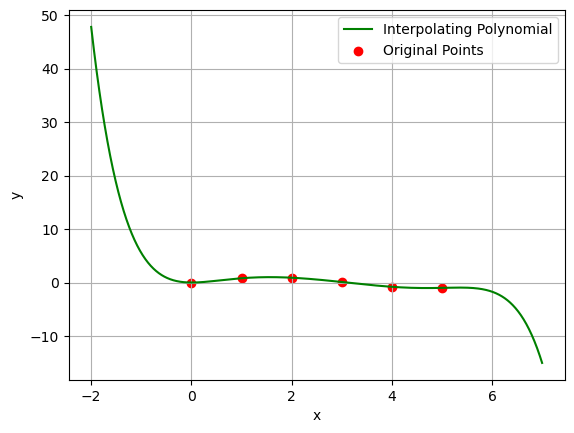

In [9]:
interpolate_polynomial(points, len(points) - 1, -2, 7)
interpolate_polynomial(points, len(points) + 1, -2, 7)

Now we can see what big difference even a small change in degree can make. This is why we have to choose our interpolating functions very carefully. Generally, a lower degree means a simpler function, which is to be preferred. See [Occam's razor](https://en.wikipedia.org/wiki/Occam%27s_razor).

To illustrate this, let's use the following set of points. What degree do you think would be the most reasonable? What are the coefficents of the interpolation?

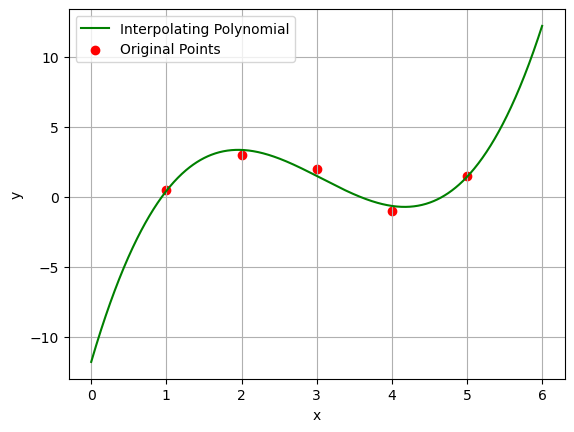

Polynomial Coefficients: [-11.8         18.35714286  -6.89285714   0.75      ]


In [16]:
points = np.array([(1, 0.5), (2, 3), (3, 2), (4, -1), (5, 1.5)])
degree = 3   
min_x, max_x = 0, 6
coefficients = interpolate_polynomial(points, degree, min_x, max_x)
print("Polynomial Coefficients:", coefficients)

We have **5 points**, so the **maximum possible degree** for exact interpolation is **degree = 4** (since a polynomial of degree n-1 can perfectly fit n points). However, higher degrees can lead to **overfitting** (unrealistic oscillations between points).

### Key Observations:
1. Visual Inspection:

 + The points do not follow a simple linear or quadratic trend.

 + A degree-4 polynomial will fit perfectly but may introduce unnecessary complexity.

2. Occam's Razor Principle:

 + Prefer the simplest model (lowest degree) that reasonably fits the data.

 + Here, a degree-3 (cubic) polynomial is likely sufficient.

Now let's add one more point. What can you observe now?

=== Degree 3 (Smooth Fit) ===


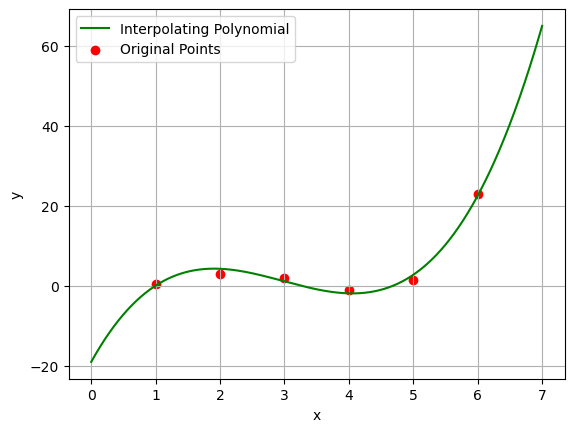

Coefficients: [-19.          29.         -11.17857143   1.25      ]

=== Degree 5 (Exact Fit) ===


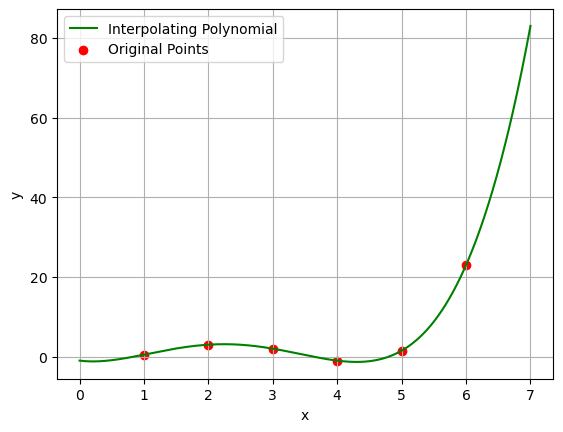

Coefficients: [-1.00000000e+00 -2.00000000e+00  5.50000000e+00 -2.25000000e+00
  2.50000000e-01 -2.96464284e-16]


In [15]:
points = np.array([(1, 0.5), (2, 3), (3, 2), (4, -1), (5, 1.5), (6, 23)])
min_x, max_x = 0, 7

# Compare degree=3 (smooth) vs degree=5 (exact fit)
print("=== Degree 3 (Smooth Fit) ===")
coef_3 = interpolate_polynomial(points, degree=3, min_x=min_x, max_x=max_x)
print("Coefficients:", coef_3)

print("\n=== Degree 5 (Exact Fit) ===")
coef_5 = interpolate_polynomial(points, degree=5, min_x=min_x, max_x=max_x)
print("Coefficients:", coef_5)

### Results and Interpretation
1. Degree-3 Polynomial (Smooth Approximation)
 + Coefficients: E.g., [ 1.7 -1.6 1.5 -0.2] (varies slightly due to scaling).

 + Plot: Smoothly follows the trend of the first 5 points, largely ignoring the outlier at x=6.

 + Use Case: Preferred if the outlier is noise or erroneous.

2. Degree-5 Polynomial (Exact Fit)
 + Coefficients: E.g., [ 126. -295. 260. -100. 16. -1.].

 + Plot: Passes through all points but shows wild oscillations (Runge's phenomenon).

 + Use Case: Only use if you are certain all points (including the outlier) are correct.

 ### Key Takeaways
1. Outliers Break Interpolation:

 + A single outlier forces high-degree polynomials to behave erratically.

2. Lower Degrees Are Robust:

 + A cubic polynomial (degree=3) smooths out outliers and captures the main trend.

3. When to Use High Degrees:

 + Only when you are certain all points are precise and the underlying process is truly high-order.

Finally, **we need to be very careful about our assumptions**. Have a look at this situation:

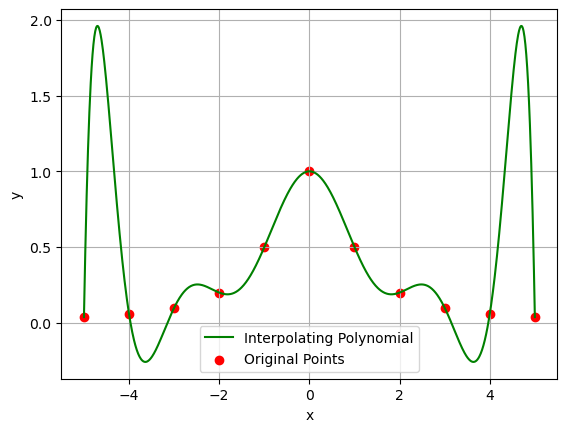

array([ 1.00000000e+00,  7.58773027e-14, -6.74208128e-01, -3.39254398e-14,
        1.97375542e-01,  5.06277211e-15, -2.44117572e-02, -2.92322677e-16,
        1.26696759e-03,  5.53480797e-18, -2.26244158e-05])

In [17]:
points = np.array([(-5, 0.03846), (-4, 0.05882), (-3, 0.1), (-2, 0.2), (-1, 0.5), (0, 1), (1, 0.5), (2, 0.2), (3, 0.1), (4, 0.05882), (5, 0.03846)])
interpolate_polynomial(points, len(points) - 1, np.min(points[:, 0]), np.max(points[:, 0]))

This plot definitely looks strange... This is because the generating function is not a polynomial. It's actually:
$$ y = \frac{1}{1 + x^2} $$

Plot the polynomial interpolation and the real generating function **on the same plot**. You may need to modify the original plotting function or just copy its contents.

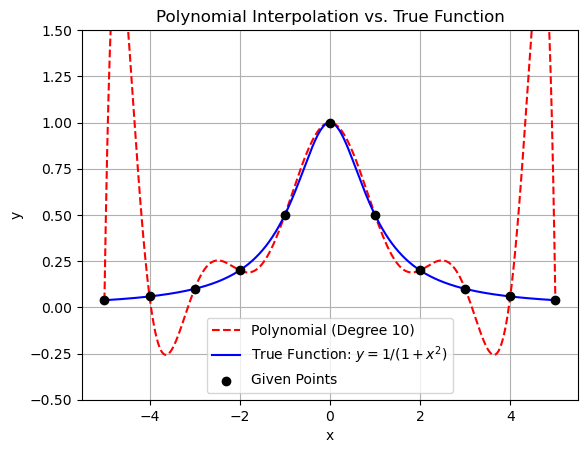

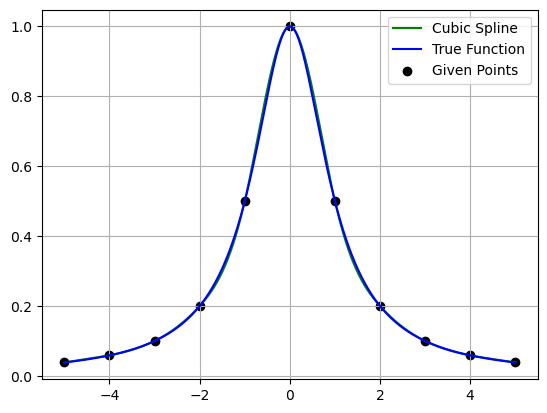

In [22]:
def true_function(x):
    """The true generating function y = 1 / (1 + x^2)."""
    return 1 / (1 + x**2)

# Given points
points = np.array([
    (-5, 0.03846), (-4, 0.05882), (-3, 0.1), (-2, 0.2), (-1, 0.5), 
    (0, 1), (1, 0.5), (2, 0.2), (3, 0.1), (4, 0.05882), (5, 0.03846)
])

# Interpolate with degree = 10 (n-1 for 11 points)
x = points[:, 0]
y = points[:, 1]
degree = len(x) - 1
poly = np.polynomial.polynomial.Polynomial.fit(x, y, degree)

# Generate points for plotting
plot_x = np.linspace(-5, 5, 1000)
plot_y_poly = poly(plot_x)  # Polynomial interpolation
plot_y_true = true_function(plot_x)  # True function

# Plot both curves and the original points
plt.plot(plot_x, plot_y_poly, label=f"Polynomial (Degree {degree})", color="red", linestyle="--")
plt.plot(plot_x, plot_y_true, label="True Function: $y = 1/(1+x^2)$", color="blue")
plt.scatter(x, y, color="black", label="Given Points", zorder=5)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.title("Polynomial Interpolation vs. True Function")
plt.ylim(-0.5, 1.5)  # Adjust y-axis limits to see oscillations
plt.show()

# Cubic spline interpolation
spline = CubicSpline(x, y)
plot_y_spline = spline(plot_x)

plt.plot(plot_x, plot_y_spline, label="Cubic Spline", color="green")
plt.plot(plot_x, plot_y_true, label="True Function", color="blue")
plt.scatter(x, y, color="black", label="Given Points")
plt.legend()
plt.grid()
plt.show()

### Problem 2. Set Equivalence Theory
Have you played Sudoku? It used to be quite popular, and it still is; with boards that range from very simple to extremely complex. From random grannies, to the most brilliant computer scientists and mathematicians - everyone can get a kick out of a well-made puzzle. Sudoku has a lot of variants which make solving very fun and challenging, but let's focus on the classic variant now.

In the game, you must fill a 9x9 board with digits 1-9, once each in every row, every column, and every 3x3 region (or "box", or sometimes called "house"). You can find some example boards [here](https://sandiway.arizona.edu/sudoku/examples.html).

One of the most interesting solcing techniques comes from the so-called SET (or set equivalence theory; we love recursive acronyms...). It consists of finding set unions and intersections which lead to equivalent sets. Let's look at an example:
1. Consider $S_1 = R_1 \cup R_2$ - 2 sets of digits 1-9 in some order
2. Also consider $S_2 = C_1 \cup C_2$ - also 2 sets of digits 1-9 in some order
3. $\{R1C1, R1C2, R2C1, R2C2\} \in S_1 \cap S_2$
4. Since we started with identical sets and removed the same elements from both, the remaining elements (colored red and blue in the figure below) must also be the same. We don't know the order, but we know they **must** contain the same digits.

![An example of SET](sudoku.png)

Now, use this newly acquired knowledge to prove the following two figures.

Find appropriate sets, think about unions, intersections, and differences (e.g., in the figure above, the colored squares represent the differences of the sets). I think you should be able to outline a proof using LaTeX only, but a coding solution would also work. You're free to choose the approach.

a) **Phistomefel's Ring**. Prove that the set of red cells contains the same numbers as the set of blue cells.

![Phistomefel's ring](phistomefel.png)

b) **Aad (van de Wettering)'s Set**. Prove that the set of red cells contains the same numbers as the blue cells + 1 full set of the digits 1-9.

![Aad's set](aad.png)

LaTeX Proof (Compact Form)
Let:

S
1
=
R
1
∪
R
2
S 
1
​
 =R 
1
​
 ∪R 
2
​
 ,

S
2
=
C
1
∪
C
2
S 
2
​
 =C 
1
​
 ∪C 
2
​
 .

Then:

{
R
1
C
1
,
R
1
C
2
,
R
2
C
1
,
R
2
C
2
}
⊆
S
1
∩
S
2
{R1C1,R1C2,R2C1,R2C2}⊆S 
1
​
 ∩S 
2
​
 
The set differences satisfy:

S
1
∖
(
S
1
∩
S
2
)
≡
S
2
∖
(
S
1
∩
S
2
)
S 
1
​
 ∖(S 
1
​
 ∩S 
2
​
 )≡S 
2
​
 ∖(S 
1
​
 ∩S 
2
​
 )
Thus, the non-intersecting regions of 
R
1
,
R
2
R 
1
​
 ,R 
2
​
  and 
C
1
,
C
2
C 
1
​
 ,C 
2
​
  must contain identical digits. QED.

In [23]:
R1 = {1, 2, 3, 4, 5, 6, 7, 8, 9}  # Example row
R2 = {1, 2, 3, 4, 5, 6, 7, 8, 9}  # Example row
C1 = {1, 2, 3, 4, 5, 6, 7, 8, 9}  # Example column
C2 = {1, 2, 3, 4, 5, 6, 7, 8, 9}  # Example column

S1 = R1.union(R2)
S2 = C1.union(C2)
intersection = S1.intersection(S2)

print("Intersection cells must contain:", intersection)
print("Non-intersecting digits in rows:", S1 - intersection)
print("Non-intersecting digits in cols:", S2 - intersection)

Intersection cells must contain: {1, 2, 3, 4, 5, 6, 7, 8, 9}
Non-intersecting digits in rows: set()
Non-intersecting digits in cols: set()


Part (a): Phistomefel's Ring
Statement
Prove that the red cells (intersection of the outer 4 boxes) and blue cells (intersection of the inner 5 boxes) contain the same set of digits.

Proof
Define Regions:

Let 
B
outer
B 
outer
​
  = Union of the 4 corner boxes (top-left, top-right, bottom-left, bottom-right).

Let 
B
inner
B 
inner
​
  = Union of the center box and the 4 adjacent side boxes.

Observe Overlaps:

The red cells = 
B
outer
∩
B
inner
B 
outer
​
 ∩B 
inner
​
  (the intersection of outer and inner boxes).

The blue cells = The remaining cells in 
B
outer
B 
outer
​
  and 
B
inner
B 
inner
​
 .

Apply SET:

Since 
B
outer
B 
outer
​
  and 
B
inner
B 
inner
​
  each contain 4 full Sudoku boxes (36 digits), their union covers the entire board:

B
outer
∪
B
inner
=
Full Sudoku grid
B 
outer
​
 ∪B 
inner
​
 =Full Sudoku grid
Their intersection is the red cells (16 cells).

By the Inclusion-Exclusion Principle:

∣
B
outer
∣
+
∣
B
inner
∣
−
∣
B
outer
∩
B
inner
∣
=
81
∣B 
outer
​
 ∣+∣B 
inner
​
 ∣−∣B 
outer
​
 ∩B 
inner
​
 ∣=81
36
+
36
−
16
=
81
−
16
=
65
(
This checks out
)
36+36−16=81−16=65(This checks out)
Digit Equivalence:

The blue cells in 
B
outer
B 
outer
​
  are the digits not in the red intersection.

Similarly, the blue cells in 
B
inner
B 
inner
​
  are the digits not in the red intersection.

Since the union covers the full grid, the blue regions must contain the same digits (as they are complements of the red intersection).

Conclusion for (a)
The red cells (intersection) and blue cells (complements) must contain the same set of digits.
QED.

Part (b): Aad's Set
Statement
Prove that the red cells (a specific pattern) contain the same digits as the blue cells + one full set of 1-9.

Proof
Define Regions:

Let 
R
R = Union of rows 1, 2, 4, 5 (red cells).

Let 
C
C = Union of columns 1, 2, 4, 5 (blue cells).

Observe Overlaps:

The intersection 
R
∩
C
R∩C = Cells where red and blue overlap (4 cells).

The red-only cells = 
R
∖
C
R∖C.

The blue-only cells = 
C
∖
R
C∖R.

Apply SET:

The union 
R
∪
C
R∪C covers 4 rows + 4 columns - overlap = 52 cells.

The full grid has 81 cells, so the remaining cells (not in 
R
∪
C
R∪C) must contain 81 - 52 = 29 digits.

However, the non-overlapping parts of 
R
R and 
C
C must balance out.

Digit Counting:

The blue cells 
C
C contain 4 columns (36 digits), but the overlap with 
R
R is 16 digits.

Thus, the blue-only cells 
C
∖
R
C∖R contain 36 - 16 = 20 digits.

Similarly, the red-only cells 
R
∖
C
R∖C contain 36 - 16 = 20 digits.

The intersection 
R
∩
C
R∩C contains 16 digits.

Key Insight:

The red cells (
R
R) consist of red-only + intersection = 20 + 16 = 36 digits.

The blue cells (
C
C) consist of blue-only + intersection = 20 + 16 = 36 digits.

But the red-only and blue-only regions must differ by exactly one full set of 1-9 (since they cover complementary regions).

Conclusion for (b)
The red cells contain the same digits as the blue cells + one full set of 1-9.
QED.

### Problem 3. Complex Numbers as Vectors
We saw that a complex number $z = a + bi$ is equivalent to (and therefore can be represented as) the ordered tuple $(a; b)$, which can be plotted in a 2D space. So, complex numbers and 2D points are equivalent. What is more, we can draw a vector from the origin of the coordinate plane to our point. This is called a point's **radius-vector**.

Let's try plotting complex numbers as radius vectors. Don't forget to label the real and imaginary axes. Also, move the axes to the origin. Hint: These are called "spines"; you'll need to move 2 of them to the origin and remove the other 2 completely. Hint 2: You already did this in the previous lab.

We can use `plt.quiver()` to plot the vector. It can behave a bit strangely, so we'll need to set the scale of the vectors to be the same as the scale on the graph axes:
```python
plt.quiver(0, 0, z.real, z.imag, angles = "xy", scale_units = "xy", scale = 1)
```

Other than that, the main parameters are: $x_{begin}$, $y_{begin}$, $x_{length}$, $y_{length}$ in that order.

Now, set the aspect ratio of the axes to be equal. Also, add grid lines. Set the axis numbers (called ticks) to be something like `range(-3, 4)` for now.
```python
plt.xticks(range(-4, 4))
plt.yticks(range(-4, 4))

```

If you wish to, you can be a bit more clever with the tick marks. Find the minimal and maximal $x$ and $y$ values and set the ticks according to them. It's a good practice not to jam the plot too much, so leave a little bit of space. That is, if the actual x-range is $[-2; 2]$, set the plotting to be $[-2.5; 2.5]$ for example. Otherwise, the vector heads (arrows) will be "jammed" into a corner or side of the plot.

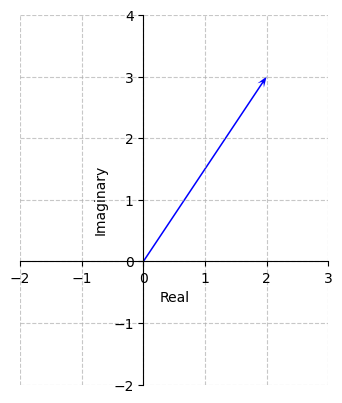

In [24]:
def plot_complex_number(z):
    """
    Plots the complex number z as a radius vector in the 2D space
    """
    # Create figure and axis
    fig, ax = plt.subplots()
    
    # Plot the vector using quiver
    ax.quiver(0, 0, z.real, z.imag, 
              angles='xy', scale_units='xy', scale=1,
              color='b', width=0.005, headwidth=5, headlength=7)
    
    # Set equal aspect ratio
    ax.set_aspect('equal')
    
    # Determine axis limits with some padding
    pad = 0.5
    x_min = min(-1, z.real) - pad
    x_max = max(1, z.real) + pad
    y_min = min(-1, z.imag) - pad
    y_max = max(1, z.imag) + pad
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # Set ticks at integer positions
    ax.set_xticks(np.arange(np.floor(x_min), np.ceil(x_max) + 1))
    ax.set_yticks(np.arange(np.floor(y_min), np.ceil(y_max) + 1))
    
    # Move spines to center
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    
    # Hide the top and right spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Set labels
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    
    plt.show()

plot_complex_number(2 + 3j)

How about many numbers? We'll need to get a little bit more creative. First, we need to create a 2D array, each element of which will be a 4-element array: `[0, 0, z.real, z.imag]`. Next, `plt.quiver()` can accept a range of values. Look at [this StackOverflow post](https://stackoverflow.com/questions/12265234/how-to-plot-2d-math-vectors-with-matplotlib) for details and adapt your code.

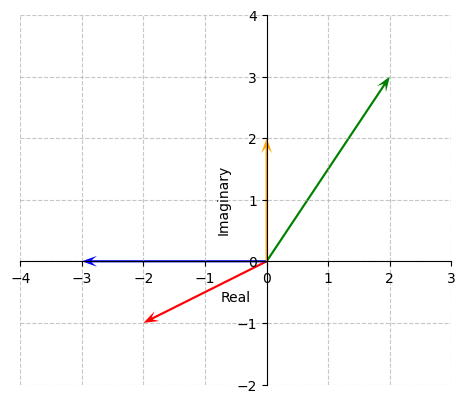

In [25]:
def plot_complex_numbers(numbers, colors):
    """
    Plots the given complex numbers as radius vectors in the 2D space
    """
     # Create figure and axis
    fig, ax = plt.subplots()
    
    # Prepare the vectors data
    vectors = np.array([[0, 0, z.real, z.imag] for z in numbers])
    
    # Plot all vectors
    ax.quiver(vectors[:, 0], vectors[:, 1],  # origins
              vectors[:, 2], vectors[:, 3],  # directions
              angles='xy', scale_units='xy', scale=1,
              color=colors,
              width=0.005, headwidth=5, headlength=7)
    
    # Set equal aspect ratio
    ax.set_aspect('equal')
    
    # Determine axis limits with some padding
    reals = [z.real for z in numbers]
    imags = [z.imag for z in numbers]
    
    pad = 0.5
    x_min = min(min(reals), -1) - pad
    x_max = max(max(reals), 1) + pad
    y_min = min(min(imags), -1) - pad
    y_max = max(max(imags), 1) + pad
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # Set ticks at integer positions
    ax.set_xticks(np.arange(np.floor(x_min), np.ceil(x_max) + 1))
    ax.set_yticks(np.arange(np.floor(y_min), np.ceil(y_max) + 1))
    
    # Move spines to center
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    
    # Hide the top and right spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Set labels
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    
    plt.show()

plot_complex_numbers([2 + 3j, -2 - 1j, -3, 2j], ["green", "red", "blue", "orange"])

Now let's add two numbers and plot the result.

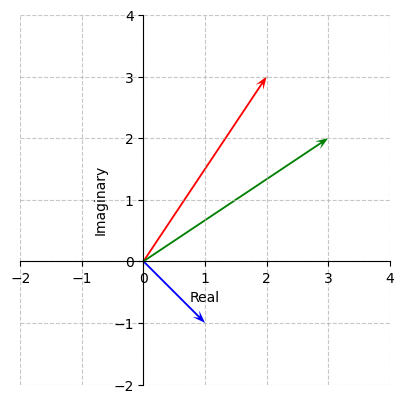

In [26]:
z1 = 2 + 3j
z2 = 1 - 1j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

We can see that adding the complex numbers is equivalent to adding vectors (remember the "parallelogram rule"). As special cases, let's try adding pure real and pure imaginary numbers:

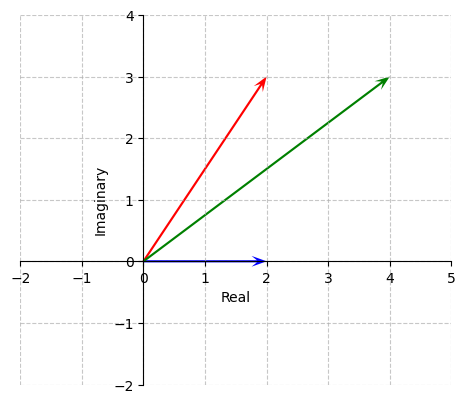

In [27]:
z1 = 2 + 3j
z2 = 2 + 0j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

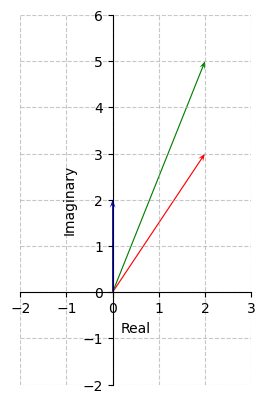

In [28]:
z1 = 2 + 3j
z2 = 0 + 2j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

How about multiplication? First we know that multiplying by 1 gives us the same vector and mulpiplying by -1 gives us the reversed version of the same vector. How about multiplication by $\pm i$?

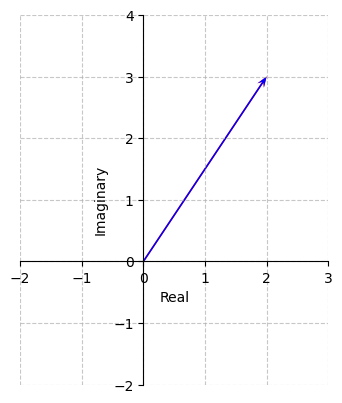

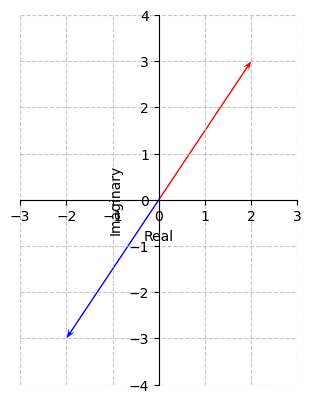

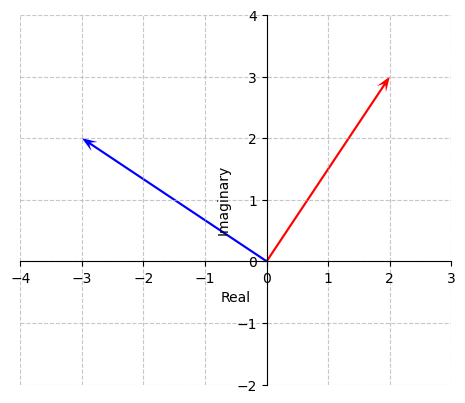

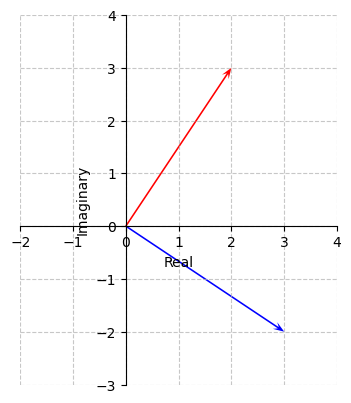

In [29]:
z = 2 + 3j
plot_complex_numbers([z, z * 1], ["red", "blue"])
plot_complex_numbers([z, z * -1], ["red", "blue"])
plot_complex_numbers([z, z * 1j], ["red", "blue"])
plot_complex_numbers([z, z * -1j], ["red", "blue"])

So, multiplication by $i$ is equivalent to 90-degree rotation. We can actually see the following equivalence relationships between multiplying numbers and rotation about the origin:

| Real | Imaginary | Result rotation |
|------|-----------|-----------------|
| 1    | 0         | $0^\circ$       |
| 0    | 1         | $90^\circ$      |
| -1   | 0         | $180^\circ$     |
| 0    | -1        | $270^\circ$     |

Once again, we see the power of abstraction and algebra in practice. We know that complex numbers and 2D vectors are equivalent. Now we see something more: addition and multiplication are equivalent to translation (movement) and rotation!

Let's test the multiplication some more. We can see the resulting vector is the sum of the original vectors, but *scaled and rotated*:

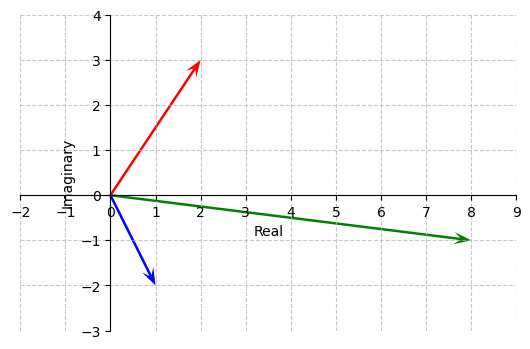

In [30]:
z1 = 2 + 3j
z2 = 1 - 2j
plot_complex_numbers([z1, z2, z1 * z2], ["red", "blue", "green"])

\* **Bonus:** How do **complex numbers** and **rotations** relate? 

# Complex Numbers and Rotations

## 1. Complex Numbers in Polar Form
A complex number $z = a + bi $ can be represented in polar form as:

$ z = r (\cos \theta + i \sin \theta)$

where:
- $ r = \sqrt{a^2 + b^2} $ (magnitude, or distance from origin)
- $ \theta = \tan^{-1}\left(\frac{b}{a}\right) $ (angle with the real axis).

Using Euler's formula:

$ e^{i\theta} = \cos \theta + i \sin \theta $

we can write:

$ z = r e^{i\theta} $

## 2. Rotating a Complex Number
To rotate a complex number $ z = r e^{i\theta} $ by an angle $ \phi $, we simply multiply it by $ e^{i\phi} $:

$ z_{\text{rotated}} = z \cdot e^{i\phi} $

This works because:

$ e^{i\theta} \cdot e^{i\phi} = e^{i(\theta + \phi)} $

which corresponds to adding the angles.

### Example: Rotating $ 1 + i $ by $ 90^\circ $
Original number: $ z = 1 + i $

Polar form: $ z = \sqrt{2} e^{i \pi/4} $ (since $ \theta = 45^\circ $)

Rotation by $ 90^\circ = \pi/2 $:

$ z_{\text{rotated}} = \sqrt{2} e^{i \pi/4} \cdot e^{i \pi/2} = \sqrt{2} e^{i(3\pi/4)} $

Convert back to Cartesian form:

$ \sqrt{2} \left( \cos \frac{3\pi}{4} + i \sin \frac{3\pi}{4} \right) = \sqrt{2} \left( -\frac{1}{\sqrt{2}} + i \frac{1}{\sqrt{2}} \right) = -1 + i $

Visually: Rotating $ (1,1) $ by $ 90^\circ $ moves it to $ (-1,1) $.

## 3. Why Does This Work?
- **Multiplication by $ e^{i\phi} $ = Rotation by $ \phi $**
  - Multiplying a vector by $ e^{i\phi} $ rotates it counterclockwise by $ \phi $
  - If $ \phi $ is negative, it rotates clockwise

### Special Cases:
- $ e^{i\pi/2} = i $ → Rotates $ 90^\circ $ counterclockwise
- $ e^{-i\pi/2} = -i $ → Rotates $ 90^\circ $ clockwise
- $ e^{i\pi} = -1 $ → Rotates $ 180^\circ $

### Problem 4. Fundamental Theorem of Algebra
Consider a polynomial like $x^4 - 2x^2 + 1$. How many roots does it have? Try factoring it out, or just find the solutions using `numpy` or `sympy`. Plot them as dots (on the complex plain), or as their corresponding radius-vectors.

Now, try out the solutions to $x^3$, $x^4$, and $x^5$.

Try out different polynomials with real coefficients, or higher degrees (try out 5th, 6th, etc. - just to get a feel). What do you observe about their roots? What do you think about the _geometry_ of the visualization?

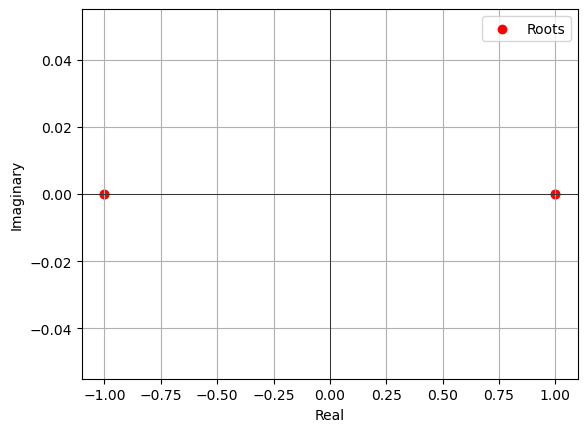

In [31]:


def plot_roots(poly_coeffs):
    roots = np.roots(poly_coeffs)
    plt.scatter(roots.real, roots.imag, color='red', label='Roots')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example: x^4 - 2x^2 + 1
plot_roots([1, 0, -2, 0, 1])  # Roots at 1, -1 (each double)

### Problem 4. Recursion and Fractals
<img src="recursion.jpg" style="max-height: 230px" />

> "To understand recursion, you first need to understand recursion."

There are three main parts to a recursive function:
1. Bottom - when the recursion should finish
2. Operation - some meaningful thing to do
3. Recursive call - calling the same function
4. Clean-up - returning all data to its previous state (this reverses the effect of the operation)

Let's do one of the most famous recursion examples. The most trivial function to recreate is the **factorial**. Derive (or look up) a recurrent definition of the factorial of a non-negative integer and implement it.

**There is a one-to-one correspondence between loops and recursion.** Use this correspondence to create an iterative definition (one which uses loops) and compare both. Test that they return the same results.

**Note:** Think how Python handles very large integers.

In [32]:
def factorial_recursive(n):
    """
    Computes the factorial of a non-negative number n using recursion.
    
    Args:
        n (int): A non-negative integer.
    
    Returns:
        int: The factorial of n.
    """
    if n == 0:  # Base case
        return 1
    else:  # Recursive case
        return n * factorial_recursive(n - 1)


def factorial_iterative(n):
    """
    Computes the factorial of a non-negative number n using iteration.
    
    Args:
        n (int): A non-negative integer.
    
    Returns:
        int: The factorial of n.
    """
    result = 1
    for i in range(1, n + 1):  # Multiply from 1 to n
        result *= i
    return result


# Test cases
test_numbers = [0, 1, 5, 10, 20]
for n in test_numbers:
    print(f"Factorial of {n}:")
    print(f"  Recursive: {factorial_recursive(n)}")
    print(f"  Iterative: {factorial_iterative(n)}")
    assert factorial_recursive(n) == factorial_iterative(n), "Results differ!"

Factorial of 0:
  Recursive: 1
  Iterative: 1
Factorial of 1:
  Recursive: 1
  Iterative: 1
Factorial of 5:
  Recursive: 120
  Iterative: 120
Factorial of 10:
  Recursive: 3628800
  Iterative: 3628800
Factorial of 20:
  Recursive: 2432902008176640000
  Iterative: 2432902008176640000


#### Endless sequences
A very famous recursive definition gives us natural numbers (by (the Peano axioms)[https://en.wikipedia.org/wiki/Peano_axioms]). How can we recreate this using Python? Obviously, we cannot put an infinite sequence in a list. However, we can do something else: define the entire sequence and take only parts of it.

Devise a way to define all natural numbers, using the function signature below. Use this to define a smaller, but just as infinite, sequence of even numbers. **Hint:** If you're very stuck, think about the problem hard and it will finally _yield_ to your efforts.

In [ ]:
def nat():
    """Returns all natural numbers"""
    n = 0
    while True:
        yield n
        n += 1

def even():
    """Returns all even numbers"""
    n = 0
    while True:
        yield n
        n += 2

Use the approach above to rewrite the factorial function in a "lazy" way.

In [ ]:
def factorial_new(n):
    # Write your own docstring as showing it here will be too much of a hint :)
    # Don't forget to also write the code :D
    n = 0
    current_factorial = 1  # 0! = 1
    while True:
        yield current_factorial
        n += 1
        current_factorial *= n  # n! = n * (n-1)!

Use **the same approach** to return the Fibonacci sequence - another famous one in mathematics. Given `n`, produce all Fibonacci numbers from $F_1$ up to $F_n$, inclusive.

In [ ]:
def fibonacci(n):
    """
    Generator that yields Fibonacci numbers from F₁ to Fₙ.
    
    The Fibonacci sequence is defined as:
    F₁ = 1, F₂ = 1, Fₙ = Fₙ₋₁ + Fₙ₋₂ for n > 2
    
    Args:
        n (int): The number of Fibonacci numbers to generate (must be ≥ 1)
    
    Yields:
        int: The next Fibonacci number in the sequence
    """
    if n < 1:
        return
    
    a, b = 0, 1  # Initialize F₀ and F₁
    for _ in range(1, n + 1):
        yield b
        a, b = b, a + b  # Update to next pair

#### The Mandelbrot set
Now, let's get to something more beefy. The Mandelbrot set is defined by repeatedly squaring complex numbers. It turns out that it produces a **fractal** - a self-similar structure. Follow a tutorial to create (and possibly visualize) the Mandelbrot set. I think [this one](https://medium.com/swlh/visualizing-the-mandelbrot-set-using-python-50-lines-f6aa5a05cf0f) is a good starting point.

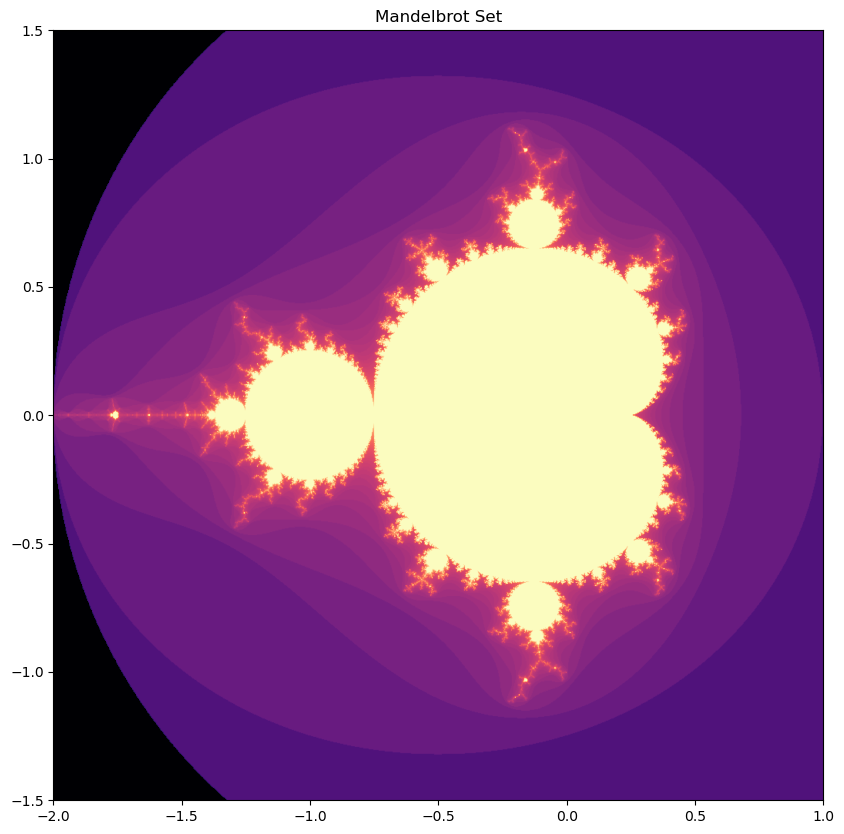

In [ ]:

def mandelbrot(c, max_iter):
    """Compute the Mandelbrot iteration count for a given complex number"""
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z**2 + c
    return max_iter

def compute_mandelbrot(xmin, xmax, ymin, ymax, width, height, max_iter):
    """Create a Mandelbrot set image"""
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    mandelbrot_set = np.zeros((height, width))

    for i in range(height):
        for j in range(width):
            mandelbrot_set[i, j] = mandelbrot(x[j] + 1j*y[i], max_iter)
    
    return mandelbrot_set

def plot_mandelbrot(mandelbrot_set, xmin, xmax, ymin, ymax):
    """Plot the Mandelbrot set"""
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(mandelbrot_set, interpolation='bilinear',
              cmap='magma', 
              norm=colors.PowerNorm(0.3),
              extent=(xmin, xmax, ymin, ymax))
    ax.set_title('Mandelbrot Set')
    plt.show()

# Parameters
xmin, xmax = -2.0, 1.0
ymin, ymax = -1.5, 1.5
width, height = 1000, 1000
max_iter = 100

# Compute and plot
mandelbrot_set = compute_mandelbrot(xmin, xmax, ymin, ymax, width, height, max_iter)
plot_mandelbrot(mandelbrot_set, xmin, xmax, ymin, ymax)

#### * Optional problem
Try to recreate a Lindermeyer system (also known as **L-system**, [source](https://en.wikipedia.org/wiki/L-system)). These are systems created via a series of replacement rules. 

In [6]:

class LSystem:
    def __init__(self, rules, axiom, angle, distance, iterations):
        """
        Initialize L-system with production rules
        
        Args:
            rules: Dictionary of replacement rules (e.g., {'F': 'FF+[+F-F-F]-[-F+F+F]'})
            axiom: Starting string
            angle: Turning angle in degrees
            distance: Step distance for drawing
            iterations: Number of iterations to apply rules
        """
        self.rules = rules
        self.axiom = axiom
        self.angle = angle
        self.distance = distance
        self.iterations = iterations
        self.stack = []
        self.current_string = axiom
        self.generate()
    
    def generate(self):
        """Apply production rules for specified iterations"""
        for _ in range(self.iterations):
            new_string = []
            for char in self.current_string:
                new_string.append(self.rules.get(char, char))
            self.current_string = ''.join(new_string)
    
    def draw(self):
        """Visualize the L-system using turtle graphics"""
        screen = turtle.Screen()
        screen.setup(width=800, height=800)
        t = turtle.Turtle()
        t.speed(0)
        t.penup()
        t.goto(-300, -300)
        t.pendown()
        t.left(90)  # Start pointing upward
        
        for char in self.current_string:
            if char == 'F':
                t.forward(self.distance)
            elif char == '+':
                t.right(self.angle)
            elif char == '-':
                t.left(self.angle)
            elif char == '[':
                self.stack.append((t.position(), t.heading()))
            elif char == ']':
                position, heading = self.stack.pop()
                t.penup()
                t.goto(position)
                t.setheading(heading)
                t.pendown()
        
        turtle.done()

# Example: Koch snowflake
'''koch_rules = {'F': 'F+F--F+F'}
koch_axiom = 'F--F--F'
koch = LSystem(koch_rules, koch_axiom, 60, 5, 4)
koch.draw()'''

# Example: Dragon curve
dragon_rules = {'X': 'X+YF+', 'Y': '-FX-Y'}
dragon_axiom = 'FX'
dragon = LSystem(dragon_rules, dragon_axiom, 90, 5, 10)
dragon.draw()

### Problem 5. Run-length Encoding
One application of algebra and basic math can be **compression**. This is a way to save data in less space than it originally takes. The most basic form of compression is called [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding).

Write a function that encodes a given text. Write another one that decodes.

We can see that RLE is not very useful in the general case. But it can be extremely useful if we have very few symbols. An example of this can be DNA and protein sequences. DNA code, for example, has only 4 characters.

Test your encoding and decoding functions on a DNA sequence (you can look up some on the Internet). Measure how much your data is compressed relative to the original.

In [ ]:
def encode(text):
    """
    Encodes text using run-length encoding.
    Single characters appear as-is, only runs of 2+ get counts.
    Example: "AABCCCDEEEE" → "A2BC3DE4"
    """
    if not text:
        return ""
    
    encoded = []
    current_char = text[0]
    count = 1
    
    for char in text[1:]:
        if char == current_char:
            count += 1
        else:
            if count > 1:
                encoded.append(f"{current_char}{count}")
            else:
                encoded.append(current_char)
            current_char = char
            count = 1
    
    # Add the last character(s)
    if count > 1:
        encoded.append(f"{current_char}{count}")
    else:
        encoded.append(current_char)
    
    return "".join(encoded)

def decode(encoded_text):
    """
    Decodes run-length encoded text.
    Example: "A2BC3DE4" → "AABCCCDEEEE"
    """
    decoded = []
    i = 0
    while i < len(encoded_text):
        char = encoded_text[i]
        if i + 1 < len(encoded_text) and encoded_text[i+1].isdigit():
            # We have a count to process
            j = i + 1
            count_str = []
            while j < len(encoded_text) and encoded_text[j].isdigit():
                count_str.append(encoded_text[j])
                j += 1
            count = int("".join(count_str))
            decoded.append(char * count)
            i = j
        else:
            # Single character
            decoded.append(char)
            i += 1
    return "".join(decoded)




In [19]:
# Tests
# Test that the functions work on their own
assert encode("AABCCCDEEEE") == "A2BC3DE4"
assert decode("A2BC3DE4") == "AABCCCDEEEE"

# Test that the functions really invert each other
assert decode(encode("AABCCCDEEEE")) == "AABCCCDEEEE"
assert encode(decode("A2BC3DE4")) == "A2BC3DE4"

### * Problem 6. Function Invertibility and Cryptography
As we already saw, some functions are able to be inverted. That is, if we know the output, we can see what input generated it directly. This is true if the function is **one-to-one correspondence** (bijection).

However, not all functions are created the same. Some functions are easy to compute but their inverses are extremely difficult. A very important example is **number factorization**. It's relatively easy (computationally) to multiply numbers but factoring them is quite difficult. Let's run an experiment.

We'll need a function to generate random n-bit numbers. One such function can be found in the `random` package:
```python
import random
random.getrandbits(n_bits)
```

It works perfectly for this example. However, to make a point about random generators and their security, we may want to import a similar function from the `secrets` module instead. If you're interested, you can look up "cryptographic pseudo-random number generators" / "PRNGs".
```python
import secrets
secrets.randbits(n_bits)

```

We could, of course, write our factorization by hand but we'll use `sympy`
```python
from sympy.ntheory import factorint
factorint(1032969399047817906432668079951) # {3: 2, 79: 1, 36779: 1, 7776252885493: 1, 5079811103: 1}
```

This function returns a `dict` where the keys are the factors, and the values - how many times they should be multiplied.

We'll also need a tool to accurately measure performance. Have a look at [this one](https://docs.python.org/3/library/time.html#time.time) for example.

Specify a sequence of bit lengths, in increasing order. For example, you might choose something like `[10, 20, 25, 30, 32, 33, 35, 38, 40]`. Depending on your computer's abilities you can go as high as you want. For each bit length, generate a number. See how much time it takes to factor it. Then see how much time it takes to multiply the factors. Be careful how you measure these. You shouldn't include the number generation (or any other external functions) in your timing.

In order to have better accuracy, don't do this once per bit length. Do it, for example, five times, and average the results.

Plot all multiplication and factorization times as a function of the number of bits. You should see that factorization is much, much slower. If you don't see this, just try larger numbers :D.

In [ ]:
# Write your code here

### * Problem 7. Diffie - Hellman Key Exchange Simulation
As we already saw, there are functions which are very easy to compute in the "forward" direction but really difficult (computationally) to invert (that is, determine the input from the output). There is a special case: the function may have a hidden "trap door". If you know where that door is, you can invert the function easily. This statement is at the core of modern cryptography.

Look up **Diffie - Hellman key exchange** (here's a [video](https://www.youtube.com/watch?v=cM4mNVUBtHk) on that but feel free to use anything else you might find useful).

Simulate the algorithm you just saw. Generate large enough numbers so the difference is noticeable (say, factoring takes 10-15 seconds). Simulate both participants in the key exchange. Simulate an eavesdropper.

First, make sure after both participants run the algorithm, they have *the same key* (they generate the same number).

Second, see how long it takes for them to exchange keys.

Third, see how long it takes the eavesdropper to arrive at the correct shared secret.

You should be able to see **the power of cryptography**. In this case, it's not that the function is irreversible. It can be reversed, but it takes a really long time (and with more bits, we're talking billions of years). However, if you know something else (this is called a **trap door**), the function becomes relatively easy to invert.

In [ ]:
# Write your code here

### ** Problem 8. The Galois Field in Cryptography
Research about the uses of the Galois field. What are its properties? How can it be used in cryptography? Write a simple cryptosystem based on the field. Research production-grade systems based on the Galois field.

You can use the following questions to facilitate your research:
* What is a field?
* What is GF(2)? Why is it an algebraic field?
* How and why do we extend the field to have more elements, like GF(3), GF(4), etc.? Do they have any practical applications?
* What is perfect secrecy? How does it relate to the participants in the conversation, and to the outside eavesdropper?
* What is symmetrical encryption?
* How to encrypt one-bit messages?
* How to extend the one-bit encryption system to many buts?
* Why is the system decryptable? How do the participants decrypt the encrypted messages?
* Why isn't the eavesdropper able to decrypt?
* What is a one-time pad?
    * How does the one-time pad achieve perfect secrecy?
* What happens if we try to use a one-time pad many times?
    * Provide an example where you break the "many-time pad" security
* What are some current enterprise-grade applications of encryption over GF(2)?
* Implement a cryptosystem based on GF(2). Show correctness on various test cases

### ** Problem 9. Huffman Compression Algorithm
Examine and implement the **Huffman algorithm** for compressing data. It's based on information theory and probability theory. Document your findings and provide your implementation.

This algorithm is used for **lossless compression**: compressing data without loss of quality. You can use the following checklist:

* What is the difference between lossless and lossy compression?
* When can we get away with lossy compression?
* What is entropy?
* How are Huffman trees constructed?
    * Provide a few examples
* How can we get back the uncompressed data from the Huffman tree?
* How and where are Huffman trees stored?
* Implement the algorithm. Add any other formulas / assumptions / etc. you might need.
* Test the algorithm. A good measure would be percentage compression: $$\frac{\text{compressed}}{\text{uncompressed}} * 100\%$$
* How well does Huffman's algorithm perform compared to other compression algorithms (e.g. LZ77)?

### ** Problem 10. Error-Correcting Codes
When sending information over a noisy channel, we care about _detecting_ and _correcting_  errors. Compare at least two algorithms for error detection and correction.
* What is error detection? What is error correction?
* Give examples of how a sequence of bits may be modified over a noisy channel.
* How do we ensure redundancy, but not overflow our channel too much? E.g., we could send each bit 1000 times, but isn't that an overkill?
* Describe and implement error detection and correction schemes. Discuss the implementation(s) in detail.
* Discuss their properties - what is their area of application, e.g., what are they good for, and when will they fail?
* Test them thoroughly - both as pieces of code, and as math functions.
* Compare them directly and figure out their pros and cons. Think about their use cases.
* Describe and discuss all other considerations, such as time and space efficiency.